In [20]:
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display

In [11]:
audio = os.path.join("/Volumes/gurindapalli/projects/tone-training-app/audio_test/a1_FV1_MP3.mp3")

In [12]:
y, sr = librosa.load(audio, sr=16000)

In [14]:
y

array([ 1.5764992e-05,  3.4141267e-05,  2.5686757e-05, ...,
       -2.0613933e-09, -5.8613836e-10, -1.1846328e-09], dtype=float32)

In [15]:
sr

16000

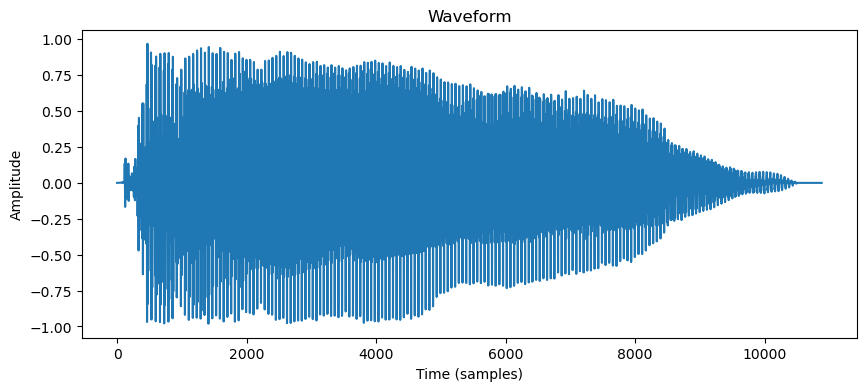

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [18]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # 13 coefficients
print(mfcc.shape)  # (13, Time-frames)

(13, 22)


In [19]:
mfcc

array([[-1.14723953e+02, -3.61411781e+01, -2.87922230e+01,
        -5.73235474e+01, -1.05330658e+02, -1.34040070e+02,
        -1.42721588e+02, -1.33054886e+02, -1.40107880e+02,
        -1.64224960e+02, -1.82171875e+02, -1.95139633e+02,
        -1.86642441e+02, -1.80780746e+02, -1.86847092e+02,
        -2.04450287e+02, -2.15381256e+02, -2.46696320e+02,
        -3.06371796e+02, -3.46124573e+02, -3.71986328e+02,
        -4.17660400e+02],
       [ 9.60625763e+01,  7.77707672e+01,  6.64457397e+01,
         5.05642929e+01,  4.45253983e+01,  3.39883881e+01,
         1.85278130e+01,  2.11190910e+01,  3.30402641e+01,
         3.30648270e+01,  3.85299263e+01,  4.69294548e+01,
         4.82026100e+01,  4.83957520e+01,  4.74848251e+01,
         4.66525879e+01,  5.36091919e+01,  6.67757492e+01,
         8.18404388e+01,  8.76461258e+01,  8.58665390e+01,
         6.32919960e+01],
       [-1.09153107e+02, -1.21685349e+02, -1.32099579e+02,
        -1.28053543e+02, -1.05470200e+02, -9.89058228e+01,
    

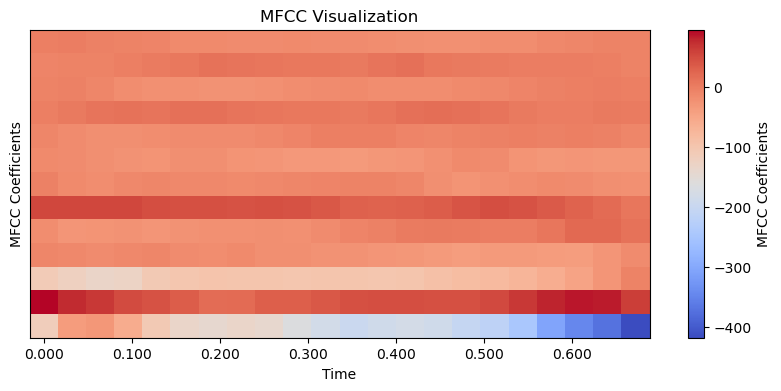

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCC Visualization')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
# 4 tones, 6 speakers (3M3F) for 5 syllables (bu, di, lu, ma, mi)

In [ ]:
# preprocess audio data
# 1. Noise reduction (High pass-filter) to remove background noise


In [ ]:
# 2. Emphasis function (Dynamic Range Compression) - prevent poor MFCC

In [ ]:
# 3. 

# Noise reduction

1. Spectral Gating (Using a Noise Profile)
   
   `pip install noisereduce`
   ```
    import noisereduce as nr
    import librosa

    # Load audio
    y, sr = librosa.load("path/to/audio.wav", sr=16000)

    # Estimate noise profile (silent section of the audio)
    noise_sample = y[0:10000]  # Example: first 10,000 samples assumed to be noise

    # Apply noise reduction
    y_denoised = nr.reduce_noise(y=y, sr=sr, y_noise=noise_sample)
   ```
   Pros:
	- Highly effective when a noise profile is available.
	- Retains the signal’s tonal characteristics.
	Cons: Requires a clear noise sample in the audio.

2. Wiener Filtering
   - smooths the audio signal based on statistical models.
   ```
   from scipy.signal import wiener

   # Apply Wiener filter
   y_denoised = wiener(y)
   ```
   Pros: Simple and fast.
	Cons: Less effective for high-noise environments.

3. Band-Pass Filtering
   - For Mandarin tones, focus on the frequency range relevant to human speech (typically 85 Hz–300 Hz for pitch information and up to 4 kHz for harmonics).
   ```
   from scipy.signal import butter, lfilter

   # Define band-pass filter
   def bandpass_filter(signal, lowcut, highcut, sr, order=5):
      nyquist = 0.5 * sr
      low = lowcut / nyquist
      high = highcut / nyquist
      b, a = butter(order, [low, high], btype='band')
      return lfilter(b, a, signal)

   # Apply filter
   y_filtered = bandpass_filter(y, lowcut=85, highcut=4000, sr=sr)
   ```
   Pros: Reduces unrelated noise outside the frequency range of human speech.
	Cons: Removes information outside the defined range, potentially affecting features.

4. Adaptive Noise Cancellation
   - An advanced method where noise is adaptively reduced by modeling and subtracting it.
   - Using Deep Learning Approaches:
     - Libraries like torch-audiomentations or SpeechBrain allow you to integrate neural network-based denoising.
   ```
   pip install torchaudio
   import torchaudio
   import torch

   # Load audio
   waveform, sr = torchaudio.load("path/to/audio.wav")

   # Apply denoising (if using a pretrained model)
   # Example: TorchHub pretrained models for noise suppression
   denoised_waveform = torchaudio.transforms.SpectralSubtraction()(waveform)
   ```
   Pros: Advanced, suitable for very noisy data.
	Cons: Requires more computational resources and setup.

5. Combined Techniques
      1.	Use band-pass filtering to remove irrelevant frequency noise.
      2.	Apply spectral gating to suppress broadband noise.
      3.	Use adaptive techniques (e.g., neural models) for residual noise.

General Tips for Noise Reduction in Mandarin Tones
1.	Preserve Pitch Contours: Avoid overly aggressive noise suppression that might alter the pitch (F0).
2.	Validate the Results: Listen to the denoised audio or visualize pitch contours before and after preprocessing.
3.	Batch Processing:Automate noise reduction for all files while allowing manual inspection of edge cases.
4.	Experiment: Test multiple techniques to find the best fit for your dataset.

Recommendation for Mandarin Tone Analysis
- Start with spectral gating if you can identify a noise profile.
- Use band-pass filtering to focus on the speech frequency range.
- If noise is severe, consider using deep learning-based adaptive denoising.